# Data visualization and result visualization

#### Setting up locations and libraries

In [ ]:
# Linking to drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#!pdflatex -help

Usage: pdftex [OPTION]... [TEXNAME[.tex]] [COMMANDS]
   or: pdftex [OPTION]... \FIRST-LINE
   or: pdftex [OPTION]... &FMT ARGS
  Run pdfTeX on TEXNAME, usually creating TEXNAME.pdf.
  Any remaining COMMANDS are processed as pdfTeX input, after TEXNAME is read.
  If the first line of TEXNAME is %&FMT, and FMT is an existing .fmt file,
  use it.  Else use `NAME.fmt', where NAME is the program invocation name,
  most commonly `pdftex'.

  Alternatively, if the first non-option argument begins with a backslash,
  interpret all non-option arguments as a line of pdfTeX input.

  Alternatively, if the first non-option argument begins with a &, the
  next word is taken as the FMT to read, overriding all else.  Any
  remaining arguments are processed as above.

  If no arguments or options are specified, prompt for input.

-draftmode              switch on draft mode (generates no output PDF)
-enc                    enable encTeX extensions such as \mubyte
-etex                   enable e-TeX e

In [ ]:
# Importing needed libraries for preprocessing and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'roman',
#     'pgf.rcfonts': False,
# })
import seaborn as sns

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)


In [ ]:
# Filtering warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the drive
import os
os.chdir("/content/gdrive/Shared drives/NMT_for_African_Language/Experiment_1")

## Data statistics

In [ ]:
# Code adapted from https://www.geeksforgeeks.org/count-number-of-lines-in-a-text-file-in-python/

def count_lines(filename):
  # Opening a file
  file = open(filename,"r")
  Counter = 0
    
  # Reading from file
  Content = file.read()
  CoList = Content.split("\n")
    
  for i in CoList:
      if i:
          Counter += 1
            
  return Counter

In [ ]:
# Kinyarwanda files
rw_train = count_lines('Kinyarwanda/train.rw')
rw_dev = count_lines('Kinyarwanda/dev.rw')
rw_test = count_lines('Kinyarwanda/test.rw')
print("Number of sentences in train files:",rw_train)
print("Number of sentences in valid files:",rw_dev)
print("Number of sentences in test files:",rw_test)

Number of sentences in train files: 435863
Number of sentences in valid files: 1000
Number of sentences in test files: 2651


In [ ]:
# Luganda files
lg_train = count_lines('Luganda/train.lg')
lg_dev = count_lines('Luganda/dev.lg')
lg_test = count_lines('Luganda/test.lg')
print("Number of sentences in train files:",lg_train)
print("Number of sentences in valid files:",lg_dev)
print("Number of sentences in test files:",lg_test)

Number of sentences in train files: 226005
Number of sentences in valid files: 1000
Number of sentences in test files: 2692


In [ ]:
# Luhya files
lh_train = count_lines('Luhyia/train.lh')
lh_dev = count_lines('Luhyia/dev.lh')
lh_test = count_lines('Luhyia/test.lh')
print("Number of sentences in train files:",lh_train)
print("Number of sentences in valid files:",lh_dev)
print("Number of sentences in test files:",lh_test)

Number of sentences in train files: 5907
Number of sentences in valid files: 1000
Number of sentences in test files: 1000


In [ ]:
# Creating our own dataframe
data = {"Model": ["Rw-En", "Lg-En", "Lh-En"],
        "Sent": [rw_train+rw_dev,lg_train+lg_dev,lh_train+lh_dev+lh_test]}
  
# Now convert this dictionary type data into a pandas dataframe
# specifying what are the column names
df = pd.DataFrame(data, columns=['Model', 'Sent'])
df.head()

,Model,Sent
0,Rw-En,436863
1,Lg-En,227005
2,Lh-En,7907


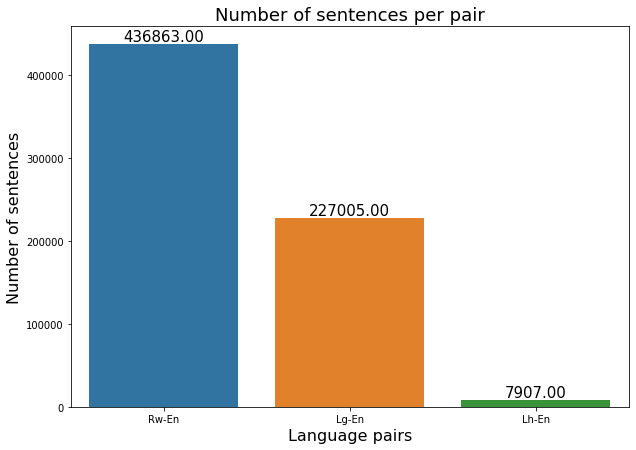

In [ ]:
# Reference: https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
# Defining the plot size
plt.figure(figsize=(10, 7))
  
# Defining the values for x-axis, y-axis
# and from which datafarme the values are to be picked
plots = sns.barplot(x="Model", y="Sent", data=df)
  
# Iterrating over the bars one-by-one
for bar in plots.patches:
    
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  
# Setting the label for x-axis
plt.xlabel("Language pairs", size= 16)
  
# Setting the label for y-axis
plt.ylabel("Number of sentences",size =16)
  
# Setting the title for the graph
plt.title("Number of sentences per pair",size=18)

#plt.savefig('Sent.pgf')
plt.show()

In [ ]:
val1 = "Kinyarwanda/joeynmt/models/rwen_reverse_transformer/validations.txt"
val2 = "Kinyarwanda/joeynmt/models/rwen_reverse_transformer2/validations.txt"
val3 = "Kinyarwanda/joeynmt/models/rwen_reverse_transformer2_continued2/validations.txt"
val4 = "Kinyarwanda/joeynmt/models/rwen_reverse_transformer2_continued3/validations.txt"
val5 = "Kinyarwanda/joeynmt/models/rwen_reverse_transformer2_continued4/validations.txt"

nam = ['Steps','Loss','PPL','BLEU','LR','Star']
r1 = pd.read_csv(val1, sep="\t", names=nam)
r2 = pd.read_csv(val2, sep="\t", names=nam)
r3 = pd.read_csv(val3, sep="\t", names=nam)
r4 = pd.read_csv(val4, sep="\t", names=nam)
r5 = pd.read_csv(val5, sep="\t", names=nam)

raw = pd.concat([r1,r2,r3,r4,r5])
raw.reset_index(drop=True, inplace=True)

raw['Rw-En'] = raw['BLEU'].str.replace('bleu: ', '')
raw['Rw-En'] = pd.to_numeric(raw['Rw-En'])

In [ ]:
l1 = "Luganda/joeynmt/models/lgen_reverse_transformer/validations.txt"
l2 = "Luganda/joeynmt/models/lgen_reverse_transformer2/validations.txt"
#l3 = "Luganda/joeynmt/models/lgen_reverse_transformer2_continued/validations.txt"
#l4 = "Luganda/joeynmt/models/lgen_reverse_transformer2_continued2/validations.txt"

dr1 = pd.read_csv(l1, sep="\t", names=nam)
dr2 = pd.read_csv(l2, sep="\t", names=nam)
#dr3 = pd.read_csv(l3, sep="\t", names=nam)
#dr4 = pd.read_csv(l4, sep="\t", names=nam)

lug = pd.concat([dr1,dr2])
lug.reset_index(drop=True, inplace=True)

lug['Lg-En'] = lug['BLEU'].str.replace('bleu: ', '')
lug['Lg-En'] = pd.to_numeric(lug['Lg-En'])

In [ ]:
valid1 = "Luhyia/joeynmt/models/lhen_reverse_transformer/validations.txt"
valid2 = "Luhyia/joeynmt/models/lhen_reverse_transformer_continued/validations.txt"

v1 = pd.read_csv(valid1, sep="\t", names=nam)
v2 = pd.read_csv(valid2, sep="\t", names=nam)

luh = pd.concat([v1,v2])
luh.reset_index(drop=True, inplace=True)

luh['Lh-En'] = luh['BLEU'].str.replace('bleu: ', '')
luh['Lh-En'] = pd.to_numeric(luh['Lh-En'])

Text(0.5, 1.0, 'Baseline Validation BLEU Score vs No. of runs')

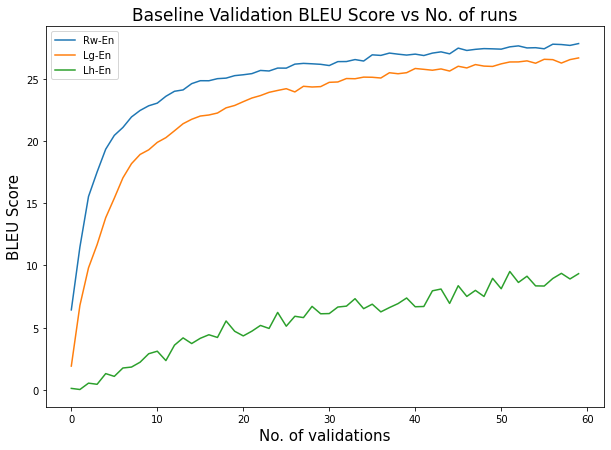

In [ ]:
plt.figure(figsize=(10, 7))
ax = raw['Rw-En'][:60].plot(legend=True)

lug['Lg-En'][:60].plot(legend=True)

luh['Lh-En'][:60].plot(legend=True)


plt.xlabel("No. of validations",size = 15)
plt.ylabel("BLEU Score",size = 15)
plt.title("Baseline Validation BLEU Score vs No. of runs",size = 17)

# plt.savefig('Rw_En')

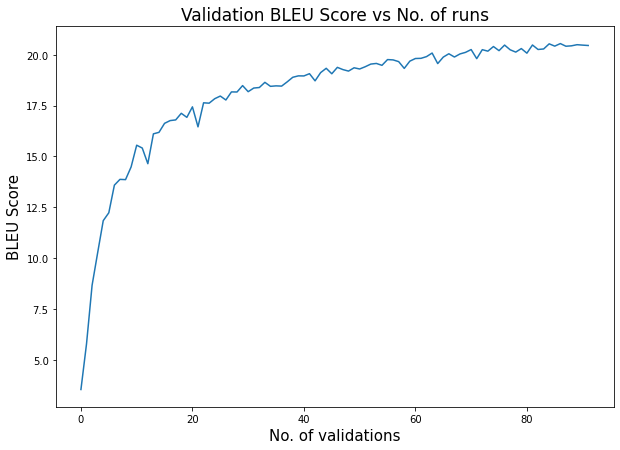

In [ ]:
vl1 = "Multilingual/joeynmt/models/lg_rw_lhen_reverse_transformer/validations.txt"
vl2 = "Multilingual/joeynmt/models/lg_rw_lhen_reverse_transformer_continued/validations.txt"
vl3 = "Multilingual/joeynmt/models/lg_rw_lhen_reverse_transformer_continued2/validations.txt"
vl4 = "Multilingual/joeynmt/models/lg_rw_lhen_reverse_transformer_continued3/validations.txt"
vl5 = "Multilingual/joeynmt/models/lg_rw_lhen_reverse_transformer_continued4/validations.txt"
vl6 = "Multilingual/joeynmt/models/lg_rw_lhen_reverse_transformer_continued5/validations.txt"
vl7 = "Multilingual/joeynmt/models/lg_rw_lhen_reverse_transformer_continued6/validations.txt"

rr1 = pd.read_csv(vl1, sep="\t", names=nam)
rr2 = pd.read_csv(vl2, sep="\t", names=nam)
rr3 = pd.read_csv(vl3, sep="\t", names=nam)
rr4 = pd.read_csv(vl4, sep="\t", names=nam)
rr5 = pd.read_csv(vl5, sep="\t", names=nam)
rr6 = pd.read_csv(vl6, sep="\t", names=nam)
rr7 = pd.read_csv(vl7, sep="\t", names=nam)

mul = pd.concat([rr1,rr2,rr3,rr4,rr5,rr6,rr7])
mul.reset_index(drop=True, inplace=True)

mul['bleu'] = mul['BLEU'].str.replace('bleu: ', '')
mul['bleu'] = pd.to_numeric(mul['bleu'])

plt.figure(figsize=(10, 7))
mul['bleu'].plot()

plt.xlabel("No. of validations", size=15)
plt.ylabel("BLEU Score", size=15)
plt.title("Validation BLEU Score vs No. of runs",size=17)
plt.show()

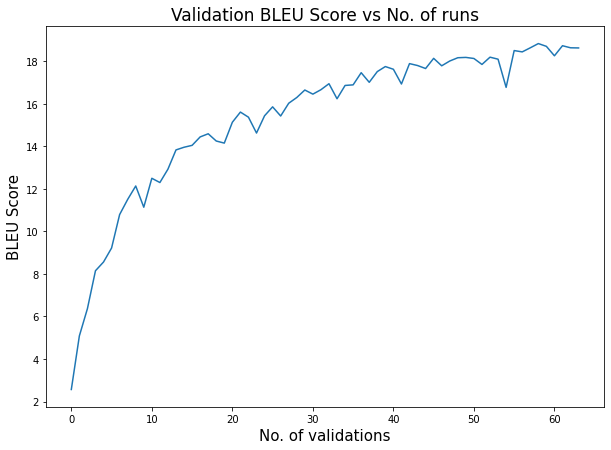

In [ ]:
val11 = "Multilingual2/joeynmt/models/lg_lhen_reverse_transformer/validations.txt"
val22 = "Multilingual2/joeynmt/models/lg_lhen_reverse_transformer_continued/validations.txt"
val33 = "Multilingual2/joeynmt/models/lg_lhen_reverse_transformer_continued2/validations.txt"
val44 = "Multilingual2/joeynmt/models/lg_lhen_reverse_transformer_continued3/validations.txt"

r11 = pd.read_csv(val11, sep="\t", names=nam)
r22 = pd.read_csv(val22, sep="\t", names=nam)
r33 = pd.read_csv(val33, sep="\t", names=nam)
r44 = pd.read_csv(val44, sep="\t", names=nam)

mul2 = pd.concat([r11,r22,r33,r44])
mul2.reset_index(drop=True, inplace=True)

mul2['bleu'] = mul2['BLEU'].str.replace('bleu: ', '')
mul2['bleu'] = pd.to_numeric(mul2['bleu'])

plt.figure(figsize=(10, 7))
mul2['bleu'].plot()

plt.xlabel("No. of validations", size=15)
plt.ylabel("BLEU Score", size=15)
plt.title("Validation BLEU Score vs No. of runs",size=17)
plt.show()

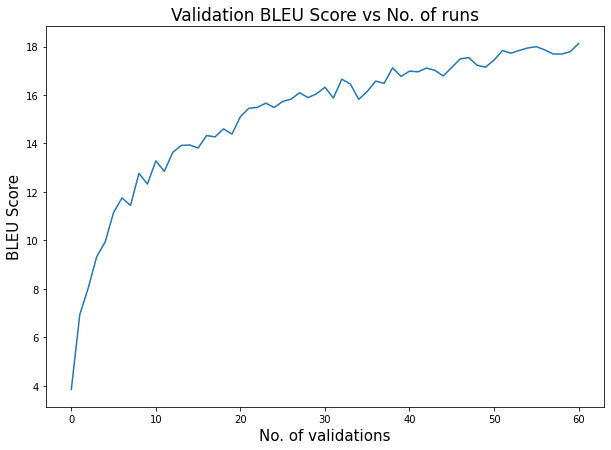

In [ ]:
vl11 = "Multilingual3/joeynmt/models/rw_lhen_reverse_transformer/validations.txt"
vl22 = "Multilingual3/joeynmt/models/rw_lhen_reverse_transformer_continued/validations.txt"
vl33 = "Multilingual3/joeynmt/models/rw_lhen_reverse_transformer_continued2/validations.txt"
vl44 = "Multilingual3/joeynmt/models/rw_lhen_reverse_transformer_continued3/validations.txt"
vl55 = "Multilingual3/joeynmt/models/rw_lhen_reverse_transformer_continued4/validations.txt"

rr11 = pd.read_csv(vl11, sep="\t", names=nam)
rr22 = pd.read_csv(vl22, sep="\t", names=nam)
rr33 = pd.read_csv(vl33, sep="\t", names=nam)
rr44 = pd.read_csv(vl44, sep="\t", names=nam)
rr55 = pd.read_csv(vl55, sep="\t", names=nam)

mul3 = pd.concat([rr11,rr22,rr33,rr44,rr55])
mul3.reset_index(drop=True, inplace=True)

mul3['bleu'] = mul3['BLEU'].str.replace('bleu: ', '')
mul3['bleu'] = pd.to_numeric(mul3['bleu'])

plt.figure(figsize=(10, 7))
mul3['bleu'].plot()

plt.xlabel("No. of validations", size=15)
plt.ylabel("BLEU Score", size=15)
plt.title("Validation BLEU Score vs No. of runs",size=17)
plt.show()

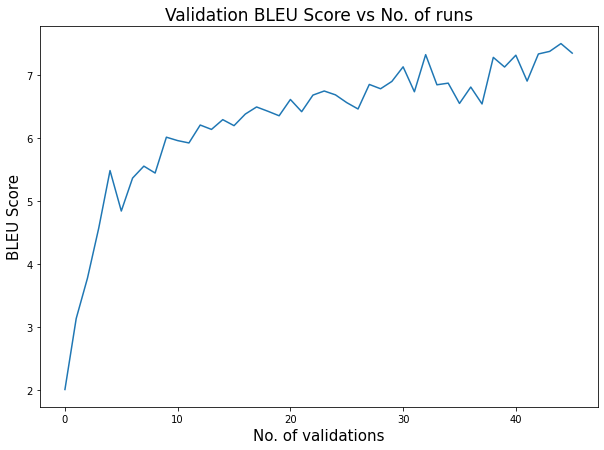

In [ ]:
valid11 = "Luhyia/joeynmt/models/back_lhen_reverse_transformer/validations.txt"
valid22 = "Luhyia/joeynmt/models/back_lhen_reverse_transformer_continued/validations.txt"
valid33 = "Luhyia/joeynmt/models/back_lhen_reverse_transformer_continued2/validations.txt"
valid44 = "Luhyia/joeynmt/models/back_lhen_reverse_transformer_continued3/validations.txt"

v11 = pd.read_csv(valid11, sep="\t", names=nam)
v22 = pd.read_csv(valid22, sep="\t", names=nam)
v33 = pd.read_csv(valid33, sep="\t", names=nam)
v44 = pd.read_csv(valid44, sep="\t", names=nam)

bluh = pd.concat([v11,v22,v33,v44])
bluh.reset_index(drop=True, inplace=True)

bluh['bleu'] = bluh['BLEU'].str.replace('bleu: ', '')
bluh['bleu'] = pd.to_numeric(bluh['bleu'])

plt.figure(figsize=(10, 7))
bluh['bleu'].plot()

plt.xlabel("No. of validations", size=15)
plt.ylabel("BLEU Score", size=15)
plt.title("Validation BLEU Score vs No. of runs",size=17)
plt.show()

Results of the models:

|                              	|       	| Lg-En 	| Lg-En 	| Rw-En 	| Rw-En 	| Lh-En 	| Lh-En 	|
|------------------------------	|-------	|:-----:	|:-----:	|:-----:	|:-----:	|:-----:	|:-----:	|
|                              	|       	|   *30*  	|   *60*  	|   *30*  	|   *60* 	|   *30*  	|   *60*  	|
| Exp 1: Baseline              	| Valid 	| 22.60 	| 26.52 	| 26.31 	| 28.5  	| 7.58  	| 10.47 	|
|                              	| Test  	| 31.79 	| 35.95 	| 37.08 	| **38.67** 	| 7.45  	| 10.39 	|
| Exp 2: Multilingual(all)     	| Valid 	| 19.62 	| 20.81 	| 19.62 	| 20.81 	| 19.62 	| 20.81 	|
|                              	| Test  	| 35.4  	| 37.1  	| 36.8  	| 38.2  	| 8.75  	| 10.21 	|
| Exp 3: Multilingual(Lg & Lh) 	| Valid 	| 17.35 	| 19.22 	| -     	| -     	| 17.35 	| 19.22 	|
|                              	| Test  	| 35.1  	| **37.3**  	| -     	| -     	| 10.12 	| **12.32** 	|
| Exp 4: Multilingual(Rw & Lh) 	| Valid 	| -     	| -     	| 17.28 	| 18.42  	| 17.28 	| 18.42   	|
|                              	| Test  	| -     	| -     	| 37.7  	| 38.3  	| 9.14  	| 10.72   	|
| Exp 5: Backtranslation       	| Valid 	| -     	| -     	| -     	| -     	| 7.14  	| 8.11   	|
|                              	| Test  	| -     	| -     	| -     	| -     	| 7.09  	|8.13   	|